## A notebook on Confusion Matrix - FPR - FNR

### Author: Krishna Yogi

### Timeline: 20/10/23 - 21/10/23

## Confusion matrix, false positive and false negative rate

- **FPR** = fp / (tn + fp)

- **FNR** = fn / (tp + fn)


The confusion matrix, the FPR and the FNR depend on the probability threshold utilised to determine the class output.

### Synopsis

This is a Python notebook that provides an explanation and practical implementation of the confusion matrix, false positive rate (FPR), and false negative rate (FNR) in the context of binary classification.

1. **Import Libraries**:
   - The code starts by importing the necessary libraries, including NumPy, pandas, Matplotlib for data manipulation, and visualization.
   - It also imports machine learning-related libraries such as scikit-learn's RandomForestClassifier and LogisticRegression for model building.

2. **Load Data**:
   - The dataset used is the KDD CUP 2004 dataset, which is loaded from the 'imbalanced-learn' package. This dataset is related to protein homology prediction and contains 74 numerical features.
   - The target variable is whether a protein is homologous to a target protein.
   - The data is preprocessed, including renaming columns and remapping the target class to 0 and 1.
   - Data is split into training and testing sets.

3. **Baseline Prediction**:
   - The baseline prediction is established by predicting the majority class in the target variable. This serves as a simple, minimal-effort model for comparison.

4. **Train Machine Learning Models**:
   - Two machine learning models are trained: Random Forest and Logistic Regression.

5. **Confusion Matrix**:
   - The confusion matrix is calculated for each of the following cases:
     - Baseline model
     - Random Forest model
     - Logistic Regression model
   - The confusion matrix provides counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

6. **FPR and FNR Calculation**:
   - For each of the three models (baseline, Random Forest, Logistic Regression), the False Positive Rate (FPR) and False Negative Rate (FNR) are calculated using the confusion matrix.
   - The FPR is calculated as `FPR = fp / (tn + fp)`, and the FNR is calculated as `FNR = fn / (tp + fn)`.

7. **FPR and FNR vs. Probability Threshold**:
   - This section explores how FPR and FNR change as the probability threshold for class prediction is varied.
   - A range of probability thresholds from 0 to 1 is created.
   - For the Logistic Regression model, FPR and FNR are calculated for each threshold, and the results are stored.
   - The FPR and FNR values are then plotted against the probability threshold to visualize how they change with varying thresholds.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

## Load data

 We will use the KDD CUP 2004 dataset, which we can upload directly from the Python package imbalanced-learn:

https://www.kdd.org/kdd-cup/view/kdd-cup-2004/Data

- target: whether a protein is homologous to a target protein

- variables: 74. The features describe the match (e.g. the score of a sequence alignment) between the native protein sequence and the sequence that is tested for homology.

- There are no missing values. All variables are numerical.

In [ ]:
import pandas as pd
from imblearn.datasets import fetch_datasets

In [ ]:
# load data
data = fetch_datasets()['protein_homo']

# prepare data in a pandas dataframe
data = pd.concat([
    pd.DataFrame(data.data),
    pd.Series(data.target)
], axis=1)

# add column names
col_names = [str(i) for i in range(74)] +['target']
data.columns = col_names

# display
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [ ]:
data.to_csv('kdd2004.csv', index=False)

In [ ]:
# load data
data = pd.read_csv('kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [ ]:
# data size

data.shape

(145751, 75)

In [ ]:
# imbalanced target

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [ ]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Baseline: predict the majority class

In [ ]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML models

### Random Forests

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

### Logistic Regression

In [ ]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

TN | FP

FN | TP

### Baseline

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[43321,     0],
       [  405,     0]])

### Random Forest

In [ ]:
confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])

array([[43320,     1],
       [  161,   244]])

### Logistic Regression

In [ ]:
confusion_matrix(y_test, logit.predict(X_test), labels=[0,1])

array([[43304,    17],
       [  117,   288]])

## FPR and FNR

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR = fn / (tp + fn)

print('False Positive Rate, baseline: ', FPR)
print('False Negative Rate, baseline: ', FNR)

False Positive Rate, baseline:  0.0
False Negative Rate, baseline:  1.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Random Forests: ', FPR)
print('False Negative Rate, Random Forests: ', FNR)

False Positive Rate, Random Forests:  2.3083492994159875e-05
False Negative Rate, Random Forests:  0.39753086419753086


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, logit.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)

False Positive Rate, Logistic Regression:  0.0003924193809007179
False Negative Rate, Logistic Regression:  0.28888888888888886


# FPR and FNR vs probability threshold

In [ ]:
thresholds = np.linspace(0, 1, 100)

thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
fpr_ls = []
fnr_ls = []

# obtain probabilities
probs = logit.predict_proba(X_test)[:,1]

for threshold in thresholds:

    # obtain class prediction based on threshold
    preds = np.where(probs>=threshold, 1, 0)

    # obtain confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()

    #  obtain FRP and FNR
    FPR = fp / (tn + fp)
    FNR =  fn / (tp + fn)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)

metrics = pd.concat([
    pd.Series(fpr_ls),
    pd.Series(fnr_ls)], axis=1)

metrics.columns = ['fpr', 'fnr']
metrics.index = thresholds

metrics.head()

,fpr,fnr
0.000000,1.000000,0.000000
0.010101,0.040073,0.064198
0.020202,0.020290,0.083951
0.030303,0.013204,0.098765
0.040404,0.009741,0.125926


Text(0.5, 1.0, 'FPR and FNR vs Discriminant Threshold')

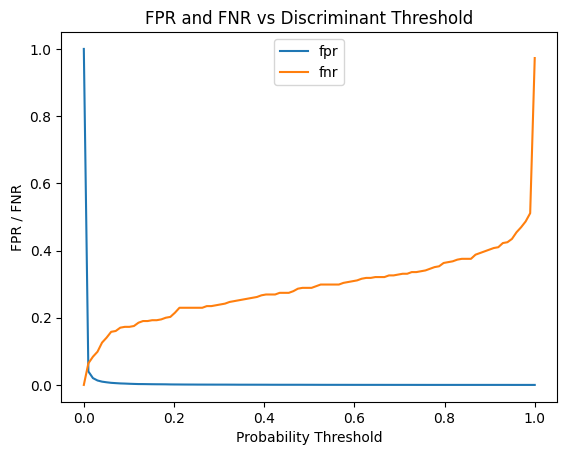

In [ ]:
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('FPR / FNR')
plt.title('FPR and FNR vs Discriminant Threshold')

### Summary

In summary, the code demonstrates the calculation and interpretation of the confusion matrix, FPR, and FNR in the context of binary classification. It uses a real dataset and machine learning models to illustrate these concepts, providing a practical example of how they can be applied in data analysis and model evaluation.